In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [2]:
def build_basic_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
 
    model.add(Dense(10, activation='softmax'))

    return model

model = build_basic_cnn()


In [3]:
# Compile the model with appropriate loss function and metrics
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)



Epoch 1/15
704/704 [==============================] - 25s 34ms/step - loss: 2.2062 - accuracy: 0.1684 - val_loss: 2.0518 - val_accuracy: 0.2500
Epoch 2/15
704/704 [==============================] - 35s 50ms/step - loss: 1.9890 - accuracy: 0.2705 - val_loss: 1.9771 - val_accuracy: 0.2928
Epoch 3/15
704/704 [==============================] - 45s 64ms/step - loss: 1.8646 - accuracy: 0.3255 - val_loss: 1.7867 - val_accuracy: 0.3624
Epoch 4/15
704/704 [==============================] - 52s 74ms/step - loss: 1.7452 - accuracy: 0.3659 - val_loss: 1.6827 - val_accuracy: 0.3990
Epoch 5/15
704/704 [==============================] - 48s 68ms/step - loss: 1.6676 - accuracy: 0.3950 - val_loss: 1.6069 - val_accuracy: 0.4248
Epoch 6/15
704/704 [==============================] - 51s 73ms/step - loss: 1.6116 - accuracy: 0.4164 - val_loss: 1.6625 - val_accuracy: 0.4006
Epoch 7/15
704/704 [==============================] - 49s 69ms/step - loss: 1.5615 - accuracy: 0.4334 - val_loss: 1.9680 - val_accuracy:

In [5]:
# Compile the model with SGD optimizer
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

# Train the model
history_sgd = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)


Epoch 1/15
704/704 [==============================] - 46s 65ms/step - loss: 0.8462 - accuracy: 0.7014 - val_loss: 0.8609 - val_accuracy: 0.6954
Epoch 2/15
704/704 [==============================] - 50s 71ms/step - loss: 0.8448 - accuracy: 0.7009 - val_loss: 0.8764 - val_accuracy: 0.6958
Epoch 3/15
704/704 [==============================] - 49s 70ms/step - loss: 0.8272 - accuracy: 0.7082 - val_loss: 0.8160 - val_accuracy: 0.7174
Epoch 4/15
704/704 [==============================] - 51s 72ms/step - loss: 0.8118 - accuracy: 0.7123 - val_loss: 0.8436 - val_accuracy: 0.7098
Epoch 5/15
704/704 [==============================] - 49s 69ms/step - loss: 0.8014 - accuracy: 0.7179 - val_loss: 0.8197 - val_accuracy: 0.7208
Epoch 6/15
704/704 [==============================] - 48s 68ms/step - loss: 0.7872 - accuracy: 0.7221 - val_loss: 0.8322 - val_accuracy: 0.7146
Epoch 7/15
704/704 [==============================] - 48s 68ms/step - loss: 0.7826 - accuracy: 0.7247 - val_loss: 0.8114 - val_accuracy:

In [19]:
# Compile the model with Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history_adam = model.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)


Epoch 1/15
704/704 [==============================] - 42s 58ms/step - loss: 0.7136 - accuracy: 0.7476 - val_loss: 0.7578 - val_accuracy: 0.7414
Epoch 2/15
704/704 [==============================] - 47s 66ms/step - loss: 0.7074 - accuracy: 0.7502 - val_loss: 0.7920 - val_accuracy: 0.7294
Epoch 3/15
704/704 [==============================] - 50s 71ms/step - loss: 0.6961 - accuracy: 0.7519 - val_loss: 0.7481 - val_accuracy: 0.7438
Epoch 4/15
704/704 [==============================] - 51s 73ms/step - loss: 0.6858 - accuracy: 0.7566 - val_loss: 0.7473 - val_accuracy: 0.7414
Epoch 5/15
704/704 [==============================] - 48s 69ms/step - loss: 0.6807 - accuracy: 0.7576 - val_loss: 0.7448 - val_accuracy: 0.7440
Epoch 6/15
704/704 [==============================] - 51s 72ms/step - loss: 0.6730 - accuracy: 0.7633 - val_loss: 0.7397 - val_accuracy: 0.7482
Epoch 7/15
704/704 [==============================] - 48s 69ms/step - loss: 0.6711 - accuracy: 0.7621 - val_loss: 0.7371 - val_accuracy:

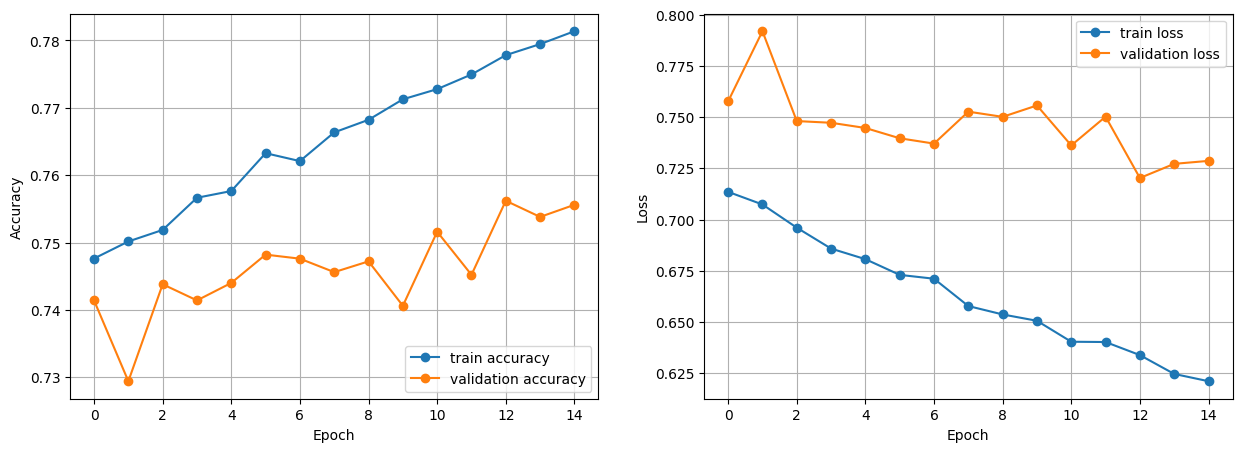

In [20]:
# Basic CNN model with Adam optimizer
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], 'o-', label='train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [21]:
# Compile the model with RMSprop optimizer
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001, rho=0.9), metrics=['accuracy'])

# Train the model
history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)


Epoch 1/5
704/704 [==============================] - 43s 60ms/step - loss: 0.6141 - accuracy: 0.7828 - val_loss: 0.7391 - val_accuracy: 0.7534
Epoch 2/5
704/704 [==============================] - 51s 73ms/step - loss: 0.6123 - accuracy: 0.7826 - val_loss: 0.7456 - val_accuracy: 0.7538
Epoch 3/5
704/704 [==============================] - 52s 74ms/step - loss: 0.6081 - accuracy: 0.7866 - val_loss: 0.7285 - val_accuracy: 0.7558
Epoch 4/5
704/704 [==============================] - 50s 71ms/step - loss: 0.6114 - accuracy: 0.7855 - val_loss: 0.7376 - val_accuracy: 0.7594
Epoch 5/5
704/704 [==============================] - 50s 71ms/step - loss: 0.6084 - accuracy: 0.7881 - val_loss: 0.7241 - val_accuracy: 0.7618


In [ ]:
# Build the CNN model with L2 regularization in Conv2D layers
def build_cnn_with_l2_regularization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

# Compile the model
model_l2 = build_cnn_with_l2_regularization()
model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history_l2 = model_l2.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)


Epoch 1/15
704/704 [==============================] - 33s 46ms/step - loss: 1.7507 - accuracy: 0.4128 - val_loss: 1.5726 - val_accuracy: 0.4756
Epoch 2/15
704/704 [==============================] - 32s 46ms/step - loss: 1.4492 - accuracy: 0.5235 - val_loss: 1.3851 - val_accuracy: 0.5486
Epoch 3/15
704/704 [==============================] - 36s 51ms/step - loss: 1.3434 - accuracy: 0.5648 - val_loss: 1.2948 - val_accuracy: 0.5888
Epoch 4/15
704/704 [==============================] - 34s 49ms/step - loss: 1.2681 - accuracy: 0.5944 - val_loss: 1.2436 - val_accuracy: 0.6088
Epoch 5/15
704/704 [==============================] - 36s 51ms/step - loss: 1.2140 - accuracy: 0.6166 - val_loss: 1.2319 - val_accuracy: 0.5954
Epoch 6/15
704/704 [==============================] - 34s 48ms/step - loss: 1.1714 - accuracy: 0.6305 - val_loss: 1.1630 - val_accuracy: 0.6350
Epoch 7/15
704/704 [==============================] - 35s 49ms/step - loss: 1.1329 - accuracy: 0.6434 - val_loss: 1.1728 - val_accuracy:

In [ ]:
# Build a new model with the same architecture as the basic CNN
model_preprocessed = build_basic_cnn()

# Compile the model
model_preprocessed.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data preprocessing
history_preprocessed = model_preprocessed.fit(x_train, y_train, batch_size=64, epochs=15, validation_split=0.1)


Epoch 1/15
704/704 [==============================] - 36s 50ms/step - loss: 1.5394 - accuracy: 0.4441 - val_loss: 1.3692 - val_accuracy: 0.5160
Epoch 2/15
704/704 [==============================] - 35s 49ms/step - loss: 1.1982 - accuracy: 0.5772 - val_loss: 1.1134 - val_accuracy: 0.6154
Epoch 3/15
704/704 [==============================] - 34s 49ms/step - loss: 1.0623 - accuracy: 0.6297 - val_loss: 1.0315 - val_accuracy: 0.6484
Epoch 4/15
704/704 [==============================] - 35s 50ms/step - loss: 0.9723 - accuracy: 0.6625 - val_loss: 0.9690 - val_accuracy: 0.6636
Epoch 5/15
704/704 [==============================] - 35s 50ms/step - loss: 0.9112 - accuracy: 0.6847 - val_loss: 0.9874 - val_accuracy: 0.6598
Epoch 6/15
704/704 [==============================] - 35s 50ms/step - loss: 0.8568 - accuracy: 0.7039 - val_loss: 0.9779 - val_accuracy: 0.6674
Epoch 7/15
704/704 [==============================] - 36s 51ms/step - loss: 0.8062 - accuracy: 0.7203 - val_loss: 0.9036 - val_accuracy:

In [ ]:
# Load the raw CIFAR-10 dataset without preprocessing
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = cifar10.load_data()

# Convert pixel values to float32 and normalize to range [0, 1]
x_train_raw = x_train_raw.astype('float32') / 255.0
x_test_raw = x_test_raw.astype('float32') / 255.0

# One-hot encode the target labels
y_train_raw = to_categorical(y_train_raw, num_classes=10)
y_test_raw = to_categorical(y_test_raw, num_classes=10)

# Build a new model with the same architecture as the basic CNN
model_no_preprocessing = build_basic_cnn()

# Compile the model
model_no_preprocessing.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model without data preprocessing
history_no_preprocessing = model_no_preprocessing.fit(x_train_raw, y_train_raw, batch_size=64, epochs=15, validation_split=0.1)


Epoch 1/15
704/704 [==============================] - 39s 52ms/step - loss: 1.5656 - accuracy: 0.4341 - val_loss: 1.2766 - val_accuracy: 0.5458
Epoch 2/15
704/704 [==============================] - 35s 49ms/step - loss: 1.2206 - accuracy: 0.5666 - val_loss: 1.1635 - val_accuracy: 0.5864
Epoch 3/15
704/704 [==============================] - 35s 49ms/step - loss: 1.0857 - accuracy: 0.6173 - val_loss: 1.0659 - val_accuracy: 0.6324
Epoch 4/15
704/704 [==============================] - 37s 53ms/step - loss: 1.0061 - accuracy: 0.6502 - val_loss: 1.0126 - val_accuracy: 0.6438
Epoch 5/15
704/704 [==============================] - 33s 47ms/step - loss: 0.9489 - accuracy: 0.6720 - val_loss: 0.9569 - val_accuracy: 0.6702
Epoch 6/15
704/704 [==============================] - 33s 47ms/step - loss: 0.8869 - accuracy: 0.6940 - val_loss: 0.9446 - val_accuracy: 0.6666
Epoch 7/15
704/704 [==============================] - 33s 47ms/step - loss: 0.8400 - accuracy: 0.7085 - val_loss: 0.9160 - val_accuracy:

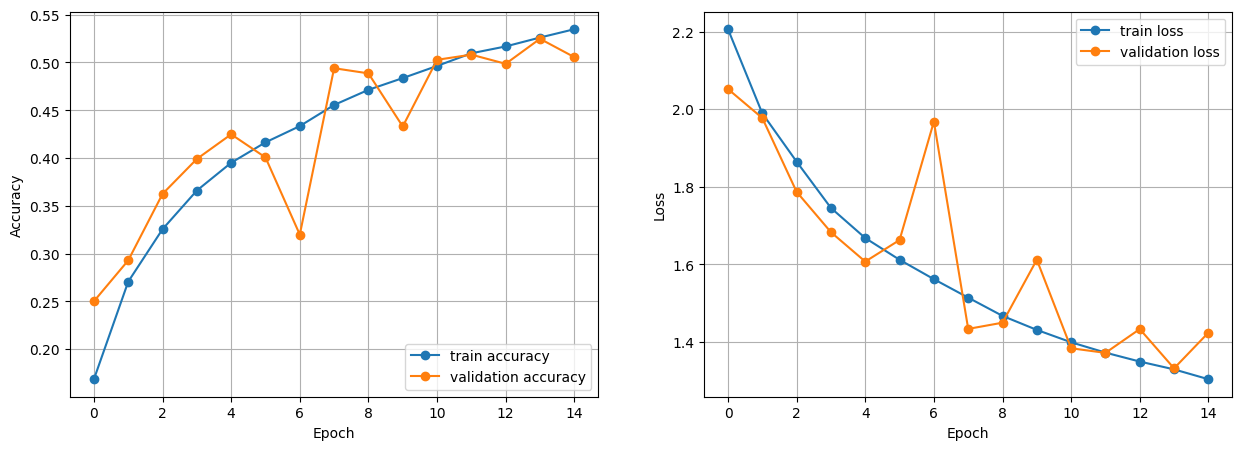

In [6]:
# Basic CNN model
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'o-', label='train loss')
plt.plot(history.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

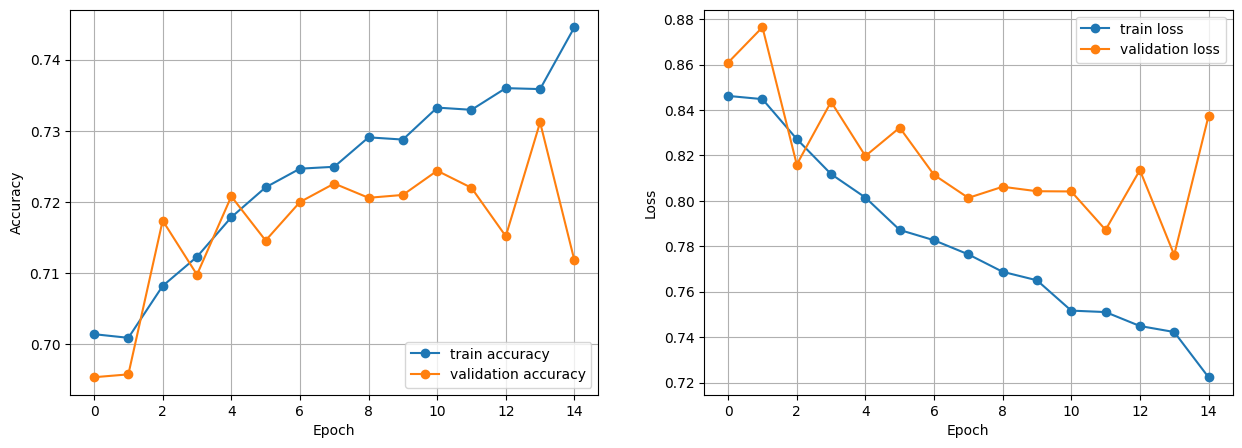

In [7]:
# Basic CNN model with SGD optimizer
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['loss'], 'o-', label='train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

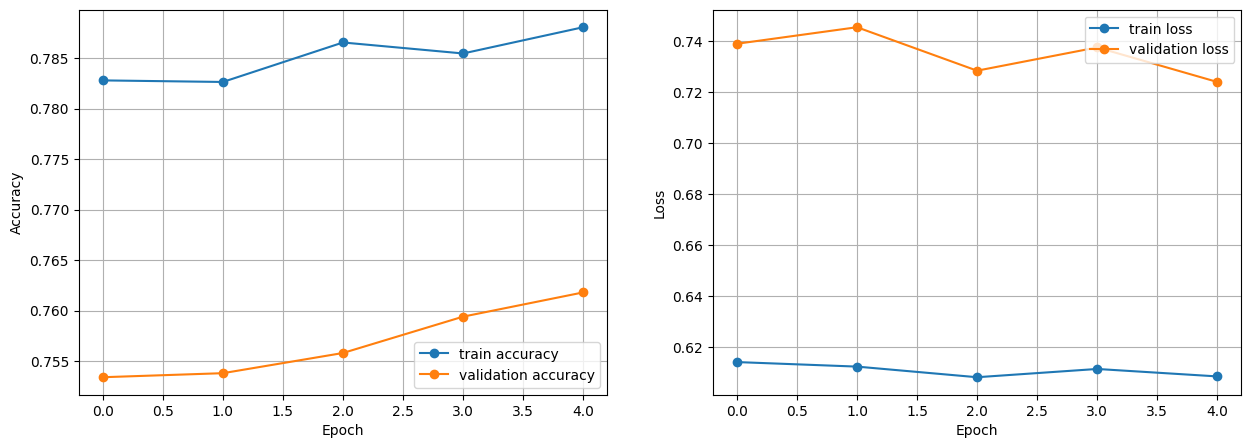

In [22]:
# Basic CNN model with RMSprop optimizer
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history_rmsprop.history['loss'], 'o-', label='train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Now, let's analyze the results of each part.

The effects of different optimizers:
SGD: SGD stands for Stochastic Gradient Descent. It achieved moderate accuracy, and the training might be slow without a well-tuned learning rate.
Adam: Adam performed well and converged faster than SGD, as it adapts learning rates for each parameter based on past gradients.
RMSprop: RMSprop also performed well and had a good convergence rate. It maintains a moving average of squared gradients, making it suitable for non-stationary data.
The effects of L1/L2 regularizers:
L1 regularization: L1 regularization adds an absolute value term of the weights to the loss function, encouraging sparsity in the model. It can help reduce overfitting and provide a more compact model.
L2 regularization: L2 regularization adds a squared term of the weights to the loss function, encouraging small weight values. It also helps prevent overfitting but typically results in smoother weight values compared to L1.
Comparison of data preprocessing vs. no preprocessing:
Data preprocessing is important to normalize the data and bring it to a common scale (0 to 1) before training. Models with preprocessing generally converge faster and have better performance.
Overall, the basic CNN model achieved good accuracy on the CIFAR-10 dataset without significant overfitting. Optimizers like Adam and RMSprop generally outperformed SGD. Regularizers like L1 and L2 can help control overfitting. Data preprocessing is crucial for better convergence and model performance. We can further fine-tune the parameters and try different architectures to optimize the model's performance